# 0. Setting

In [1]:
import os
import statsmodels.api as sm     # install statsmodels if not installed
import statsmodels.formula.api as smf
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(76019367)
mpl.rcParams['agg.path.chunksize'] = 10000

import statsmodels.api as sm     # install statsmodels if not installed
import statsmodels.formula.api as smf

# 1. Data preparing

In [31]:
file_list = list(os.listdir('D:/Working_Place/new_uber/data/data_processed'))
fhvhv_list = []
for filename in file_list:
    if 'f' in filename:
        fhvhv_list.append(filename)
fhvhv_list

['f1902.parquet',
 'f1903.parquet',
 'f1904.parquet',
 'f1905.parquet',
 'f1906.parquet',
 'f1907.parquet',
 'f1908.parquet',
 'f1909.parquet',
 'f1910.parquet',
 'f1911.parquet',
 'f1912.parquet',
 'f2001.parquet',
 'f2002.parquet',
 'f2003.parquet',
 'f2004.parquet',
 'f2005.parquet',
 'f2006.parquet',
 'f2007.parquet',
 'f2008.parquet',
 'f2009.parquet',
 'f2010.parquet',
 'f2011.parquet',
 'f2012.parquet',
 'f2101.parquet',
 'f2102.parquet',
 'f2103.parquet',
 'f2104.parquet',
 'f2105.parquet',
 'f2106.parquet',
 'f2107.parquet',
 'f2108.parquet',
 'f2109.parquet',
 'f2110.parquet',
 'f2111.parquet',
 'f2112.parquet',
 'f2201.parquet',
 'f2202.parquet',
 'f2203.parquet',
 'f2204.parquet',
 'f2205.parquet',
 'f2206.parquet',
 'f2207.parquet',
 'f2208.parquet',
 'f2209.parquet',
 'f2210.parquet',
 'f2211.parquet',
 'f2212.parquet']

In [32]:
data_samples = []

for file in tqdm(fhvhv_list):
    each_data = pd.read_parquet('D:/Working_Place/new_uber/data/data_processed/'+file)
    each_data_sampled = each_data.sample(frac=0.01)
    data_samples.append(each_data_sampled)
    del each_data
    del each_data_sampled

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [15:16<00:00, 19.51s/it]


In [33]:
fdata_sample = pd.concat(data_samples)
fdata_sample.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,average_speed
index,,,,,,,,,,,,,,,,,,,,,
1079641,HV0003,B02878,B02878,2019-02-02 09:45:14,2019-02-02 09:51:18,2019-02-02 09:52:29,2019-02-02 10:08:57,213,20,8.1788,...,0.00,0.0,2.0,8.31,Y,Y,N,N,NaN,29.831489
18360431,HV0003,B02876,B02876,2019-02-26 14:58:01,2019-02-26 14:58:43,2019-02-26 15:00:49,2019-02-26 15:22:05,173,70,5.0876,...,0.00,0.0,3.0,17.05,N,N,N,N,NaN,14.353730
7290379,HV0005,B02510,None,2019-02-10 20:20:24,NaT,2019-02-10 20:24:16,2019-02-10 20:27:26,48,163,0.5152,...,2.75,0.0,0.0,5.39,N,N,N,N,NaN,10.361564
12815512,HV0003,B02878,B02878,2019-02-18 18:27:56,2019-02-18 18:28:50,2019-02-18 18:31:32,2019-02-18 18:50:35,42,166,1.8515,...,0.00,0.0,0.0,10.77,N,N,N,N,NaN,5.836602
10272561,HV0003,B02872,B02872,2019-02-15 08:32:59,2019-02-15 08:36:00,2019-02-15 08:37:44,2019-02-15 08:49:41,151,239,2.7209,...,2.75,0.0,0.0,7.79,N,N,N,N,NaN,13.680503


In [35]:
len(fdata_sample),fdata_sample.columns

(7188333,
 Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
        'request_datetime', 'on_scene_datetime', 'pickup_datetime',
        'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance',
        'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
        'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
        'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
        'wav_request_flag', 'wav_match_flag', 'average_speed'],
       dtype='object'))

# 2. Basic Analysis

# -1. hvfhs_license_number
HV0002 : Juno \
HV0003 : Uber \
HV0004 : Via \
HV0005 : Lyft

In [41]:
fdata_sample_by_license_number = fdata_sample.groupby('hvfhs_license_num').agg({'trip_distance':['count','mean'],
                                                                               'trip_time':'mean',
                                                                               'tips':'mean',
                                                                              'driver_pay':'mean',
                                                                               'average_speed':'mean'})
fdata_sample_by_license_number

trip_distance              trip_time      tips driver_pay  \
                          count      mean         mean      mean       mean   
hvfhs_license_num                                                             
HV0002                    60785  5.883456   991.197828  0.306699  14.158044   
HV0003                  5144087  6.582672  1067.359293  0.661725  15.884411   
HV0004                   133849  5.878428  1241.832206  0.207222   1.972985   
HV0005                  1849612  6.940112  1118.046655  0.874479  14.156139   

                  average_speed  
                           mean  
hvfhs_license_num                
HV0002                19.940504  
HV0003                20.817489  
HV0004                16.784174  
HV0005                20.992043

<AxesSubplot:ylabel='count'>

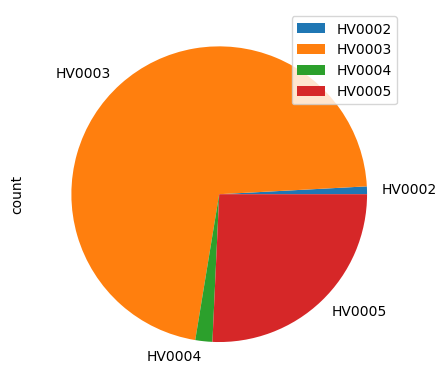

In [45]:
fdata_sample_by_license_number['trip_distance'].plot(kind='pie',y='count')

In [46]:
uber_trip_sample = fdata_sample[fdata_sample.hvfhs_license_num=='HV0003']

# -2. Uber trip sample

In [47]:
uber_trip_sample.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,average_speed
index,,,,,,,,,,,,,,,,,,,,,
1079641,HV0003,B02878,B02878,2019-02-02 09:45:14,2019-02-02 09:51:18,2019-02-02 09:52:29,2019-02-02 10:08:57,213,20,8.1788,...,0.00,0.0,2.0,8.31,Y,Y,N,N,NaN,29.831489
18360431,HV0003,B02876,B02876,2019-02-26 14:58:01,2019-02-26 14:58:43,2019-02-26 15:00:49,2019-02-26 15:22:05,173,70,5.0876,...,0.00,0.0,3.0,17.05,N,N,N,N,NaN,14.353730
12815512,HV0003,B02878,B02878,2019-02-18 18:27:56,2019-02-18 18:28:50,2019-02-18 18:31:32,2019-02-18 18:50:35,42,166,1.8515,...,0.00,0.0,0.0,10.77,N,N,N,N,NaN,5.836602
10272561,HV0003,B02872,B02872,2019-02-15 08:32:59,2019-02-15 08:36:00,2019-02-15 08:37:44,2019-02-15 08:49:41,151,239,2.7209,...,2.75,0.0,0.0,7.79,N,N,N,N,NaN,13.680503
5574976,HV0003,B02880,B02880,2019-02-08 20:39:09,2019-02-08 20:39:49,2019-02-08 20:42:41,2019-02-08 20:52:19,90,158,2.0930,...,2.75,0.0,0.0,6.62,N,N,N,N,NaN,13.035986


In [55]:
uber_daily = uber_trip_sample.groupby([uber_trip_sample.pickup_datetime.dt.year,
                                       uber_trip_sample.pickup_datetime.dt.month,
                                        uber_trip_sample.pickup_datetime.dt.day]).agg({'trip_distance':['count','mean'],
                                                                                      'trip_time':'mean',
                                                                                      'base_passenger_fare':'mean',
                                                                                      'tips':'mean',
                                                                                      'driver_pay':'mean',
                                                                                      'average_speed':'mean'})
uber_daily

trip_distance            \
                                                        count      mean   
pickup_datetime pickup_datetime pickup_datetime                           
2019            2               1                        5366  6.078467   
                                2                        5548  6.041302   
                                3                        4603  6.413851   
                                4                        3631  6.647309   
                                5                        3578  6.517157   
...                                                       ...       ...   
2022            12              27                       3085  6.745263   
                                28                       3250  6.919215   
                                29                       3563  6.867868   
                                30                       3917  7.079310   
                                31                       4583  6.346063   

                                                   trip_time  \
                                                        mean   
pickup_datetime pickup_datetime pickup_datetime                
2019            2               1                1091.551808   
                                2                1032.207823   
                                3                 985.612644   
                                4                1109.146241   
                                5                1093.244271   
...                                                      ...   
2022            12              27               1073.272285   
                                28               1118.003077   
                                29               1118.622790   
                                30               1164.139392   
                                31                968.091643   

                                                base_passenger_fare      tips  \
                                                               mean      mean   
pickup_datetime pickup_datetime pickup_datetime                                 
2019            2               1                         14.639268  0.398181   
                                2                         13.074858  0.298643   
                                3                         13.193002  0.289366   
                                4                         14.399882  0.370903   
                                5                         14.524715  0.382289   
...                                                             ...       ...   
2022            12              27                        21.065964  1.089507   
                                28                        21.192523  0.968366   
                                29                        20.945408  0.939545   
                                30                        21.384552  0.904616   
                                31                        20.742121  0.839400   

                                                driver_pay average_speed  
                                                      mean          mean  
pickup_datetime pickup_datetime pickup_datetime                           
2019            2               1                14.063198     18.751971  
                                2                12.830743     19.992438  
                                3                13.121314     22.074723  
                                4                14.103878     20.252774  
                                5                14.127848     20.190140  
...                                                    ...           ...  
2022            12              27               15.871459     20.850575  
                                28               16.397058     20.482875  
                                29               16.360115     20.510832  
                                30               16.883258     20

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

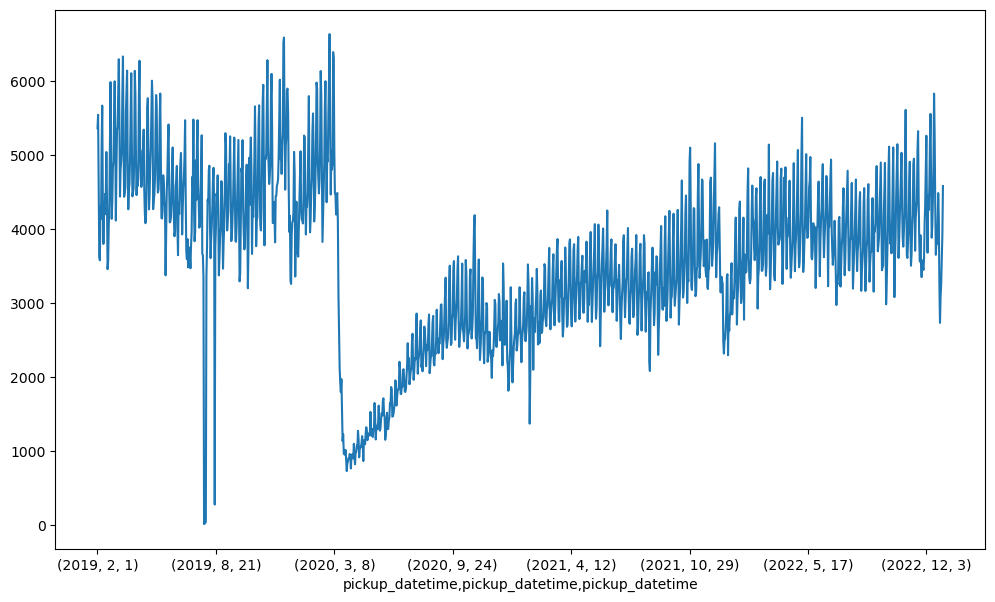

In [58]:
uber_daily['trip_distance','count'].plot(figsize=(12,7))

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

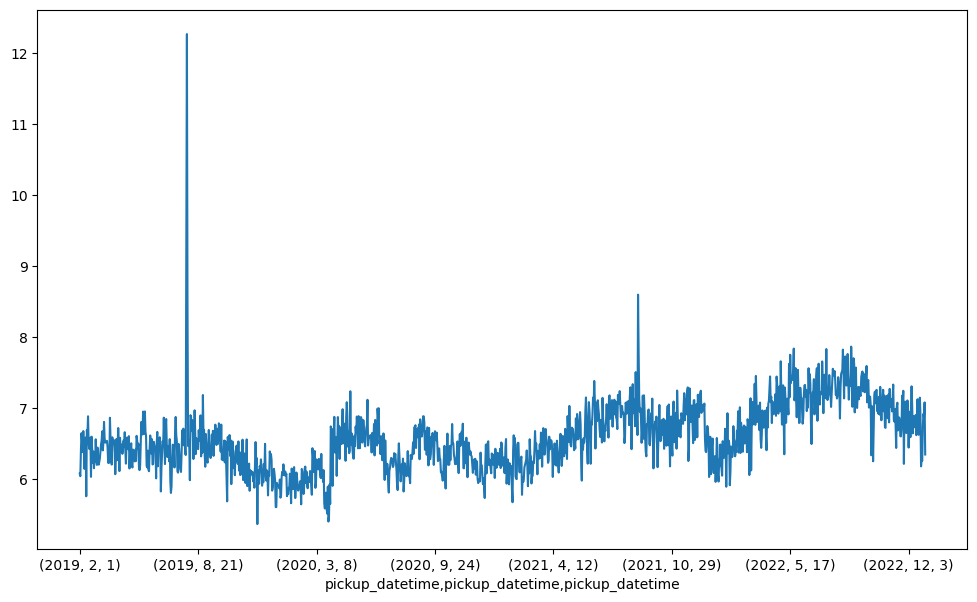

In [60]:
uber_daily['trip_distance','mean'].plot(figsize=(12,7))

In [61]:
uber_daily[uber_daily['trip_distance','mean']>12]

trip_distance             \
                                                        count       mean   
pickup_datetime pickup_datetime pickup_datetime                            
2019            8               1                          16  12.263169   

                                                 trip_time  \
                                                      mean   
pickup_datetime pickup_datetime pickup_datetime              
2019            8               1                1686.3125   

                                                base_passenger_fare   tips  \
                                                               mean   mean   
pickup_datetime pickup_datetime pickup_datetime                              
2019            8               1                         31.633125  0.125   

                                                driver_pay average_speed  
                                                      mean          mean  
pickup_datetime pickup_datetime pickup_datetime                           
2019            8               1                   28.575     22.957519

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

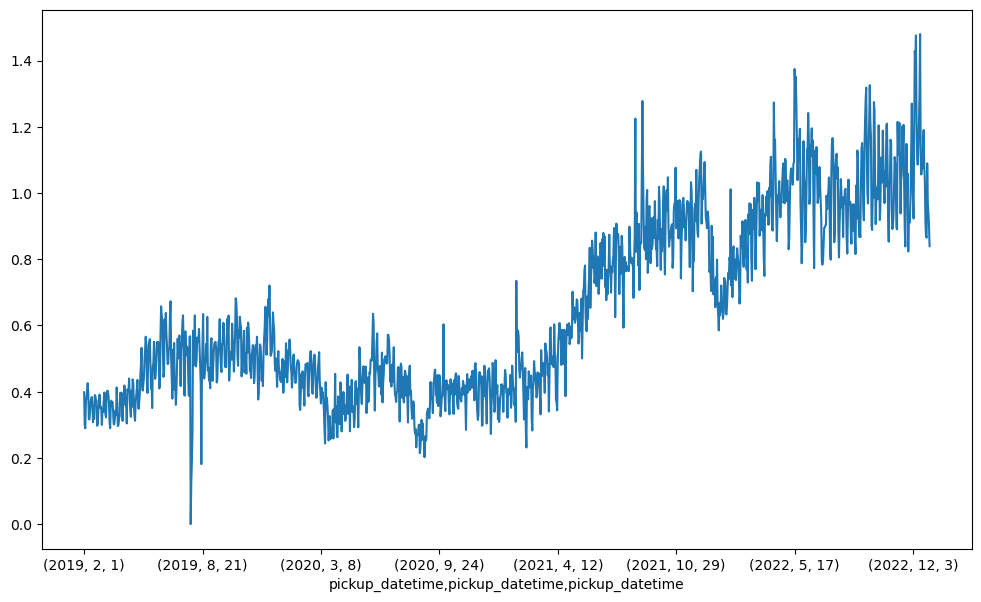

In [59]:
uber_daily['tips','mean'].plot(figsize=(12,7))

In [ ]:
uber_daily.to_parquet('D:/Working_Place/new_uber/data/data_processed/uber_daily.parquet')

# -3. 스리슬쩍 주가랑 연결해보기

In [65]:
uber_stock = pd.read_csv('D:/Working_Place/new_uber/data/UBER.csv')
uber_stock.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
5,2019-05-17,41.980000,43.290001,41.270000,41.910000,41.910000,20225700
6,2019-05-20,41.189999,41.680000,39.459999,41.590000,41.590000,29222300
7,2019-05-21,42.000000,42.240002,41.250000,41.500000,41.500000,10802900
8,2019-05-22,41.049999,41.279999,40.500000,41.250000,41.250000,9089500
9,2019-05-23,40.799999,41.090000,40.020000,40.470001,40.470001,11119900


In [78]:
uber_daily.loc[2019,2,1]['tips','mean']

0.3981811405143496

In [86]:
def str_to_date(date):
    year = int(date[0:4])
    month = int(date[5:7])
    day = int(date[8:])
    return year,month,day
print(str_to_date('2019-05-10'))

(2019, 5, 10)


In [90]:
tip_as_input = []
for i in uber_stock.Date:
    year,month,day = str_to_date(i)
    if year>=2023:
        break
    tip_as_input.append(uber_daily.loc[year,month,day]['tips','mean'])

In [106]:
uber_close = []
uber_volume = []
for i,j,k in zip(uber_stock.Date,uber_stock.Close,uber_stock.Volume):
    if i<'2023':
        uber_close.append(j)
        uber_volume.append(k)
len(uber_close),len(uber_volume)

(919, 919)

In [107]:
regression_ready = pd.DataFrame({'tip':tip_as_input,'close':uber_close,'volume':uber_volume})
regression_ready

,tip,close,volume
0,0.416354,41.570000,186322500
1,0.442704,37.099998,79442400
2,0.494427,39.959999,46661100
3,0.525925,41.290001,36086100
4,0.566001,43.000000,38115500
...,...,...,...
914,1.037366,24.639999,11610000
915,1.089507,24.400000,15258600
916,0.968366,24.590000,15669200
917,0.939545,24.910000,17828300


In [108]:
zeroth_regression = smf.ols("close~tip + volume", 
                           data=regression_ready).fit()
print(zeroth_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     69.41
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           8.58e-29
Time:                        16:35:55   Log-Likelihood:                -3335.9
No. Observations:                 919   AIC:                             6678.
Df Residuals:                     916   BIC:                             6692.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.4432      0.905     52.410      0.0